<a href="https://colab.research.google.com/github/sayevvv/PCVK_2025/blob/main/Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transformasi Linear Brightness

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Mengubah tingkat kecerahan citra 
-----------------------------------
Masukkan nilai kecerahan: 50


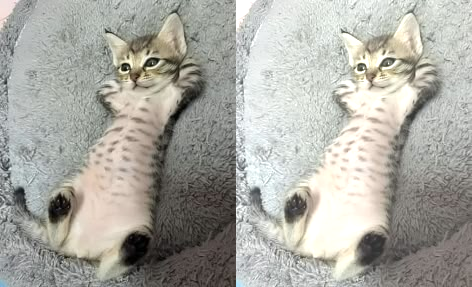

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import library yang diperlukan
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

print(' Mengubah tingkat kecerahan citra ')
print('-----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
# for y in range(original.shape[0]):
#     for x in range(original.shape[1]):
#         for c in range(original.shape[2]):
#             brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

#cara simple tanpa for loop
brightness_image = cv.convertScaleAbs(original, beta=brightness)
# cara tanpa for loop menampilkan hasil paling optimal

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)


Hasil gambar asli dan setelah inverse:


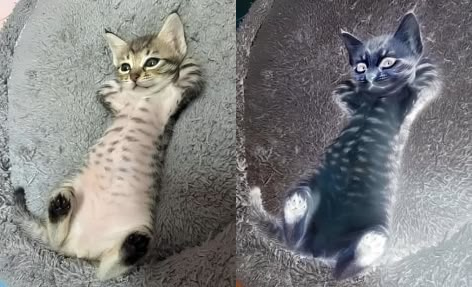

In [ ]:
# Inverse Gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten.jpg')

# Pastikan gambar berhasil dibaca
if original is None:
    print("Error: Gambar tidak ditemukan. Periksa path file.")
else:
    # Melakukan inverse dengan operasi 255 - pixel_value
    inverse_image = 255 - original

    # Menampilkan hasil sebelum dan sesudah inverse
    inverse_frame = cv.hconcat([original, inverse_image])
    print("Hasil gambar asli dan setelah inverse:")
    cv2_imshow(inverse_frame)

#kontras

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Mengubah tingkat kecerahan dan kontras citra 
-----------------------------------
Masukkan nilai kecerahan (beta): 50
Masukkan nilai kontras (alpha, contoh 1.2): 1.3
Kiri: Original | Kanan: Brightness + Contrast


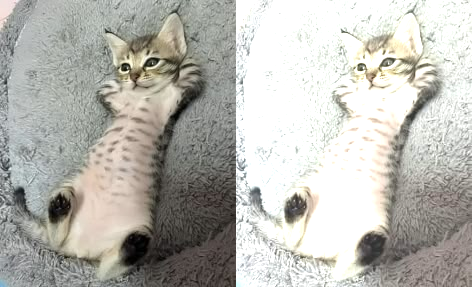

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import library yang diperlukan
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan dan kontras citra ')
print('-----------------------------------')

# Input tingkat kecerahan
try:
    brightness = int(input('Masukkan nilai kecerahan (beta): '))
except ValueError:
    print('Error, brightness harus berupa angka!')
    brightness = 0  # default jika error

# Input tingkat kontras
try:
    contrast = float(input('Masukkan nilai kontras (alpha, contoh 1.2): '))
except ValueError:
    print('Error, contrast harus berupa angka!')
    contrast = 1.0  # default jika error

# Membaca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten.jpg')

# Pastikan gambar berhasil dibaca
if original is None:
    print("Error: Gambar tidak ditemukan. Periksa path file.")
else:
    # ================================
    # Transformasi Kecerahan dan Kontras
    # ================================
    # alpha = kontras, beta = kecerahan
    adjusted_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

    # Menampilkan hasil sebelum dan sesudah
    final_frame = cv.hconcat([original, adjusted_image])
    print("Kiri: Original | Kanan: Brightness + Contrast")
    cv2_imshow(final_frame)


#Averaging, Lightness, and Luminance

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original Image


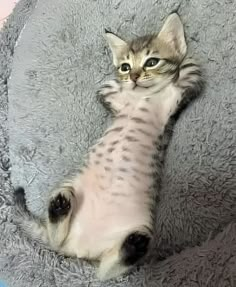

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten.jpg')

# Pastikan gambar berhasil dibaca
if original is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Periksa kembali path gambar!")

# Tampilkan gambar asli
print("Original Image")
cv2_imshow(original)


Averaging Method
#Gray=1/3(R+G+B​)

Grayscale - Averaging Method


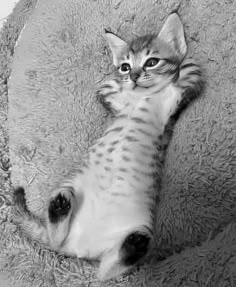

In [2]:
# Konversi ke float agar presisi lebih baik
img_float = original.astype(np.float32)

# Averaging method
average_gray = np.mean(img_float, axis=2).astype(np.uint8)

# Tampilkan hasil
print("Grayscale - Averaging Method")
cv2_imshow(average_gray)


Lightness Method
# Gray = max(R,G,B)+min(R,G,B)​/2

Grayscale - Lightness Method


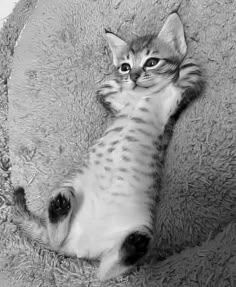

In [3]:
# Konversi ke float
img_float = original.astype(np.float32)

# Lightness method
max_val = np.max(img_float, axis=2)
min_val = np.min(img_float, axis=2)
lightness_gray = ((max_val + min_val) / 2).astype(np.uint8)

# Tampilkan hasil
print("Grayscale - Lightness Method")
cv2_imshow(lightness_gray)


Luminance
#Gray=0.299R+0.587G+0.114B

Grayscale - Luminance Method


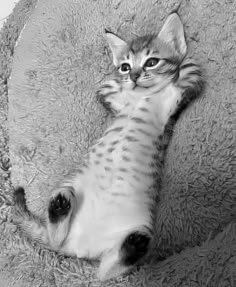

In [4]:
# Konversi ke float
img_float = original.astype(np.float32)

# Pisahkan channel BGR
B, G, R = cv.split(img_float)

# Luminance method
luminance_gray = (0.114 * B + 0.587 * G + 0.299 * R).astype(np.uint8)

# Tampilkan hasil
print("Grayscale - Luminance Method")
cv2_imshow(luminance_gray)


# Custom color selection

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original Image


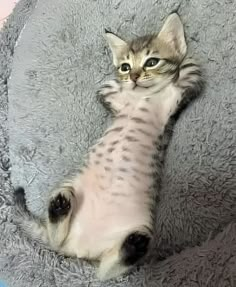

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten.jpg')

# Pastikan gambar berhasil dibaca
if original is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Periksa kembali path gambar!")

# Tampilkan gambar asli
print("Original Image")
cv2_imshow(original)

konversi gambar ke hsv

Mask Warna Krem


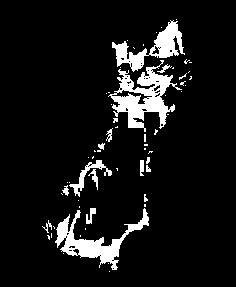

Hasil Warna Krem


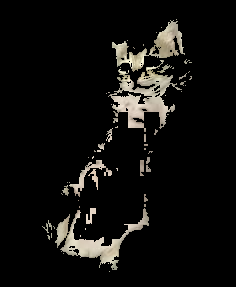

In [6]:
# Konversi gambar ke HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Tentukan rentang HSV untuk warna krem
lower_beige = np.array([15, 30, 150])   # batas bawah
upper_beige = np.array([35, 150, 255])  # batas atas

# Masking: ambil pixel yang berada dalam rentang
mask = cv.inRange(hsv, lower_beige, upper_beige)

# Terapkan mask ke gambar asli
result = cv.bitwise_and(original, original, mask=mask)

# Tampilkan hasil
print("Mask Warna Krem")
cv2_imshow(mask)

print("Hasil Warna Krem")
cv2_imshow(result)


Highlight Warna Krem


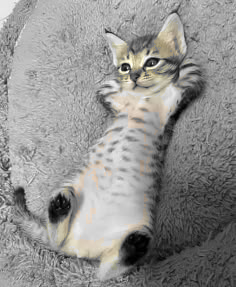

In [7]:
# Konversi gambar asli ke grayscale
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)  # konversi kembali ke 3 channel

# Area non-krem diganti dengan grayscale
final_output = np.where(mask[:, :, None] == 0, gray_bgr, original)

# Tampilkan hasil akhir
print("Highlight Warna Krem")
cv2_imshow(final_output)
